In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.tree import export_graphviz
def plot(dtree):
    export_graphviz(dtree, out_file="tree.dot",  
                filled=True, rounded=True,
                special_characters=True)
    from subprocess import call
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=150'])


In [3]:
#!unzip creditcard.zip

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

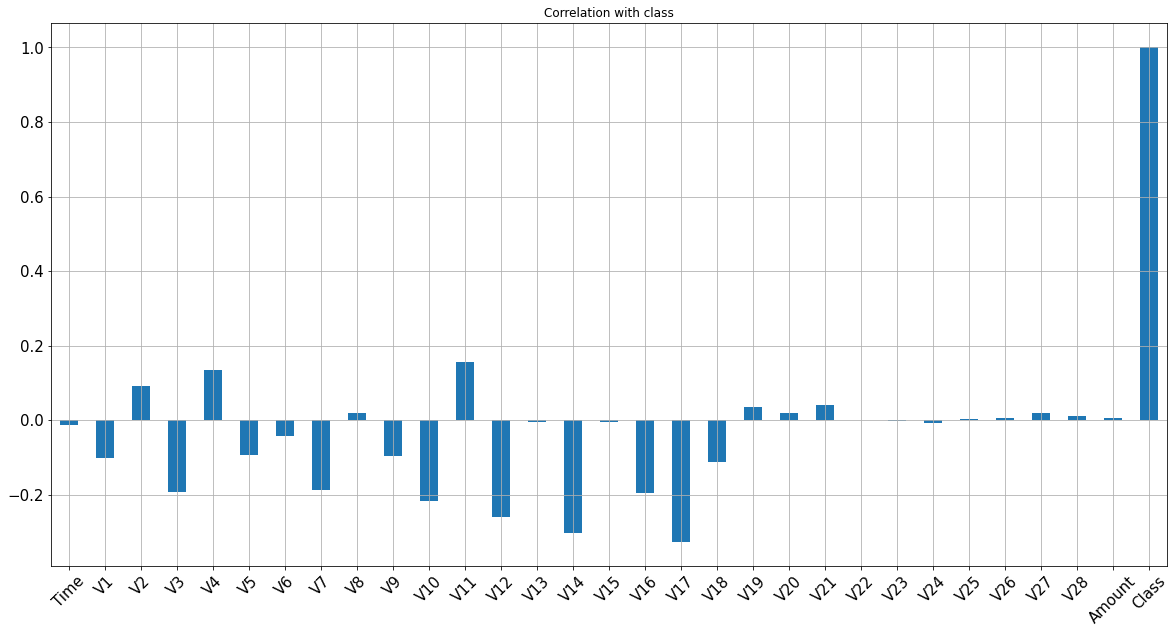

In [8]:
data.corrwith(data.Class).plot.bar(figsize=(20,10), title="Correlation with class", fontsize=15, rot=45, grid=True)

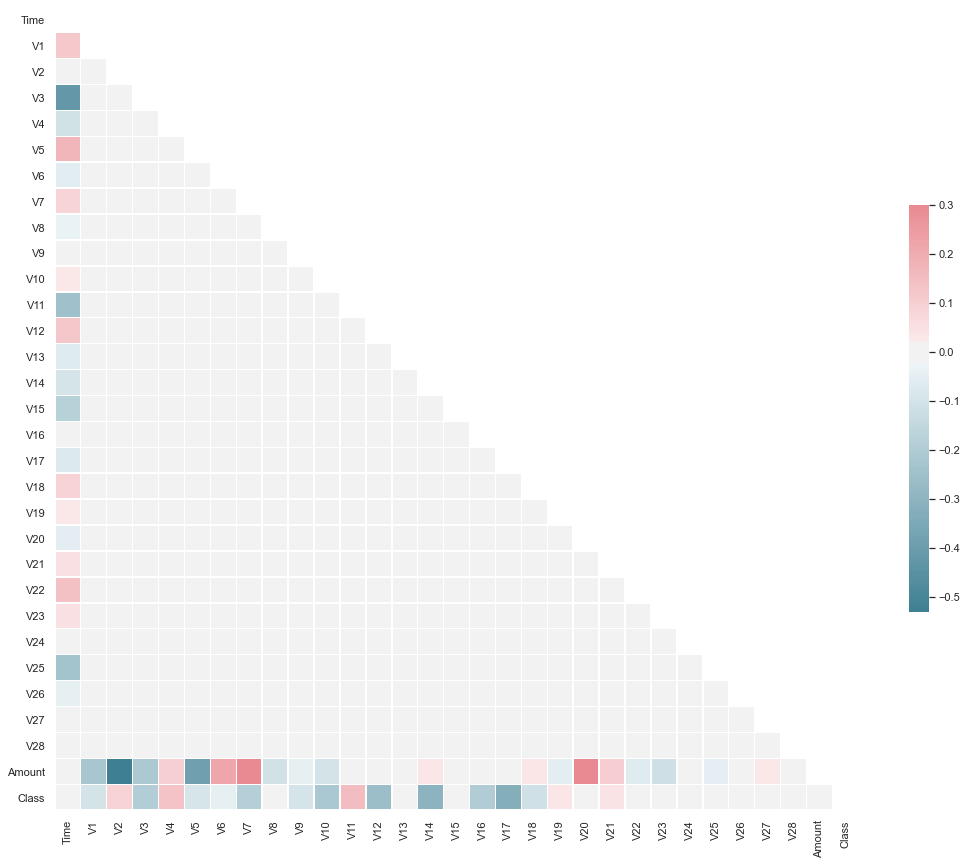

In [9]:
corr=data.corr()
sn.set(style="white")
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Decision Tree

First you need to remove the column `Time` as you will not need it for the rest of this project. 

Build a decision tree classifier and use grid search cross validation to find the best Max num Leaf parameter. Remember to split the data between train and test and not to have data leakage!. Remember also to scale the `Amount` column using the `StandardScaler`

At the end, you need to report the best parameter as well as the `accuracy_score`, `precision_score`, `recall_score`, `f1_score` which are all part of `sklearn.metrics`. 

You will also need to use the `plot` function given to you to plot the Decision Tree. (the function will save it as `png` file. 


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [11]:
Ndata = data.drop("Time",axis=1)
Ndata.head(10)
Xdata = Ndata.drop("Class",axis=1)
Ydata = Ndata["Class"]
Xdata.head(10)
Ydata.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata)

In [13]:
pipe = Pipeline([('scaler',StandardScaler()),('classifier',DecisionTreeClassifier())])

In [14]:
param_grid={'classifier__max_leaf_nodes':range(2,20)}

In [15]:
grid = GridSearchCV(pipe,param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.9996067526193084

In [16]:
p=grid.predict(X_test)
print(grid.best_params_)
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))
print(recall_score(y_test,p))
print(f1_score(y_test,p))

{'classifier__max_leaf_nodes': 19}
0.9996067526193084
0.9230769230769231
0.8
0.8571428571428571


# Random Forest

Repeat the same procedure for `RandomForest` and use GridSearchCV to find the best number of features (MaxFeatures). You need to report the same values as you did for the decision tree and compare results.  


In [17]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler',StandardScaler()),('classifier',RandomForestClassifier())])
param_grid={'classifier__max_features':range(1,30)}

In [18]:
grid = GridSearchCV(pipe,param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.9996348417179293

In [19]:
p=grid.predict(X_test)
print(grid.best_params_)
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))
print(recall_score(y_test,p))
print(f1_score(y_test,p))

{'classifier__max_features': 14}
0.9996348417179293
0.9540229885057471
0.7904761904761904
0.8645833333333333


# SVM

Repeat the same procedure for `SVM` and use GridSearchCV to find the best Kernel and best corresponding parameter. Here it is better to use a Wild pipeline like the one we used in the slides to iterate through Kernels and their parameters. You need to report the same values as you did for the decision tree and random forest and compare results. 

In [22]:
from sklearn import svm
from sklearn.svm import SVC
pipe = Pipeline([('scaler',StandardScaler()),('classifier',SVC())])
param_grid=[{'classifier__kernel':['linear']},
           {'classifier__kernel':['poly'],'classifier__gamma':['auto','scale'],'classifier__degree':range(1,10)},
           {'classifier__kernel':['rbf'],'classifier__gamma':['auto','scale']},
           {'classifier__kernel':['sigmoid']},
           {'classifier__kernel':['precomputed']}]
#param_grid={'classifier__kernel':['linear','poly','rbf','sigmoid','precomputed'],
#           'classifier__gamma':['auto','scale'],
#           'classifier__degree':[range(1,10)],
#           'classifier__coef0':[0.0,0.5,1.0,1.5,2.0,5.0,10.0],
#           'classifier__shrinking':['True','False'],
#           'classifier__decision_function_shape':['ovo','ovr']}
#It would have taken way too much time.

In [23]:
grid = GridSearchCV(pipe,param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.999522485323446

In [24]:
p=grid.predict(X_test)
print(grid.best_params_)
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))
print(recall_score(y_test,p))
print(f1_score(y_test,p))

{'classifier__degree': 3, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly'}
0.999522485323446
0.9382716049382716
0.7238095238095238
0.8172043010752689


In [ ]:
# Wolf Assi 181 450
# Rim Chidiac 180 417